In [1]:
import warnings

warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [2]:
df=pd.read_csv('DS3_C6_S3_MallCustomers_Data_Project.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### Missing value

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

##### Their are zero missing value in our data

### Visualization

- Gender distribution

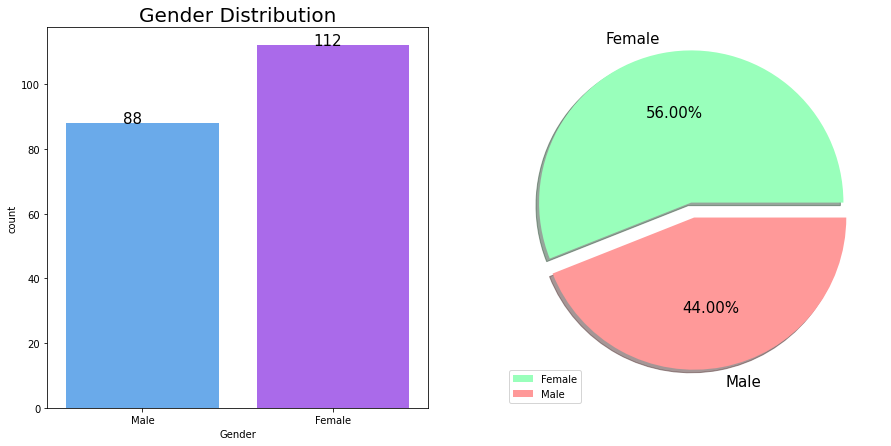

In [52]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Gender Distribution",size=20)              
percentage = df["Gender"].value_counts()         
labels = list(df["Gender"].value_counts().index) 
colors = ['#99ffbb','#ff9999']
ab=sb.countplot(x = df["Gender"], ax = ax[0],palette='cool')
for p in ab.patches:
    ab.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+0.05),fontsize=15)
plt.pie(percentage,labels = labels ,explode=[0.1,0],autopct= "%0.2f%%",shadow=True,colors=colors,textprops={'fontsize': 15})
plt.legend()
# plt.savefig("gender.png", format="png")
plt.show()

**In customer data ratio female is greater than male which is 56% of total data**

- Age distribution

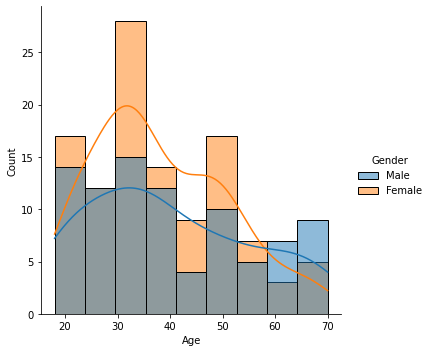

In [53]:
sb.displot(data=df,x='Age',hue='Gender',kde=True)
plt.savefig('age.png',format='png')

###### Here we can observe that for both category of gender mostly people lie between the age group of 20 to 40 years

### Gender wise annual income and spending score

In [9]:
df_male= df[df['Gender']=='Male']
df_female= df[df['Gender']=='Female']

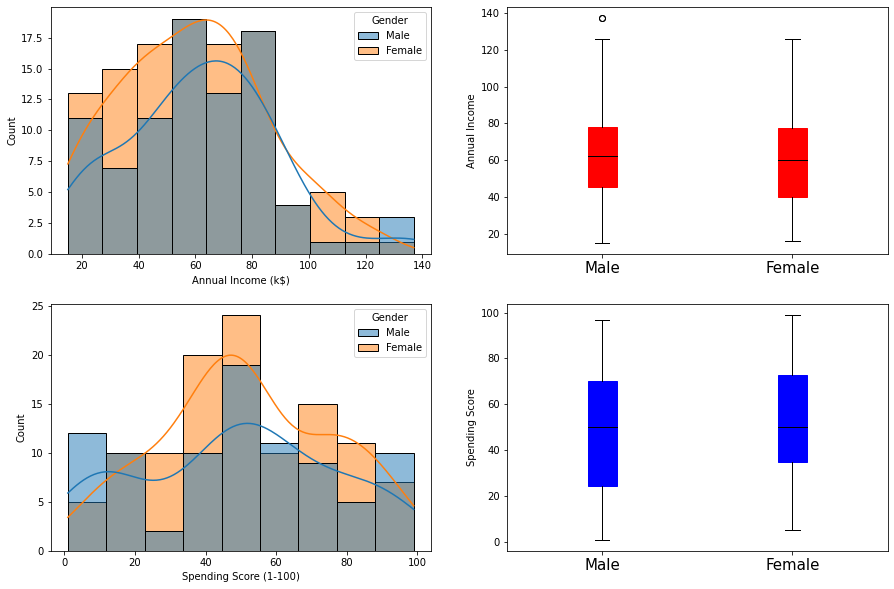

In [54]:
plt.figure(figsize=(15,10))
plt.subplot(221)
sb.histplot(data=df,x='Annual Income (k$)',hue='Gender',kde=True)
plt.subplot(222)
data=[df_male['Annual Income (k$)'],df_female['Annual Income (k$)']]
plt.boxplot(data,patch_artist=True,boxprops=dict(facecolor='red', color='red'),medianprops=dict(color='black'))
plt.xticks([1, 2], ['Male','Female'],fontsize = 15)
plt.ylabel('Annual Income')
plt.subplot(223)
sb.histplot(data=df,x='Spending Score (1-100)',hue='Gender',kde=True)
plt.subplot(224)
data=[df_male['Spending Score (1-100)'],df_female['Spending Score (1-100)']]
plt.boxplot(data,patch_artist=True,boxprops=dict(facecolor='Blue', color='blue'),medianprops=dict(color='black'))
plt.xticks([1, 2], ['Male','Female'],fontsize = 15)
plt.ylabel('Spending Score')
plt.savefig('annual.png',format='png')

Customer who belong to age group of 30 to 90 their annual income is high for both category of gender,But customer who belong to age group of 30 to 60 their spending score is high

#### Age wise annual income

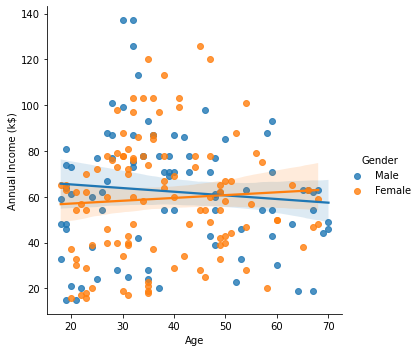

In [11]:
sb.lmplot(data=df, x="Age", y="Annual Income (k$)", hue="Gender")

#### Age wise spending on Gender basic

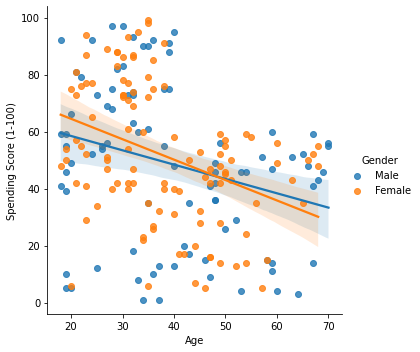

In [12]:
sb.lmplot(data=df, x="Age", y="Spending Score (1-100)", hue="Gender")

## Model Building

### K - MEAN

In [13]:
df_1= df.iloc[:,[3,4]]
df_1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


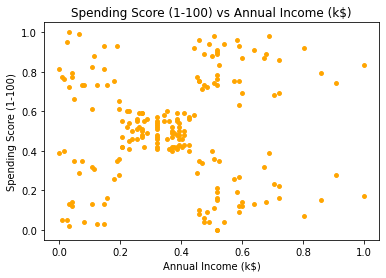

In [58]:
plt.scatter(df_1['Annual Income (k$)'], df_1['Spending Score (1-100)'], marker='.', c='orange',s=60)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.savefig('cluster.png',format='png')
plt.show()


In [15]:
col=['Annual Income (k$)','Spending Score (1-100)']
df_1[col] = MinMaxScaler().fit_transform(df[col])
df_1.head(5)

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


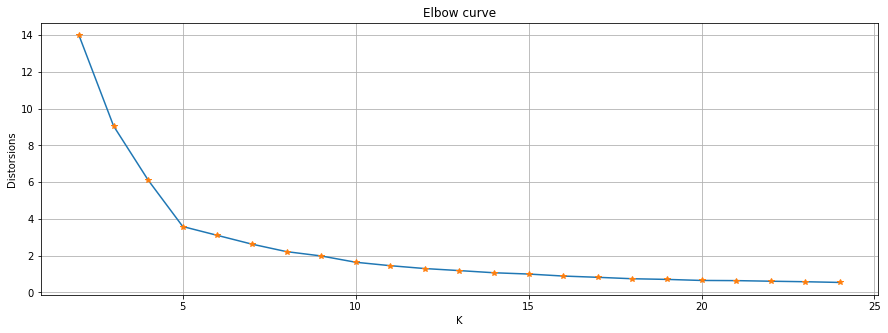

In [16]:
kk=[]
distorsions = []
for k in range(2, 25):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_1)
    distorsions.append(kmeans.inertia_)
    kk.append(k)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 25), distorsions)
plt.plot(kk,distorsions,'*')
plt.grid()
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve');

For n_clusters = 3 The average silhouette_score is : 45.15
For n_clusters = 4 The average silhouette_score is : 49.62
For n_clusters = 5 The average silhouette_score is : 55.95
For n_clusters = 6 The average silhouette_score is : 53.55
For n_clusters = 7 The average silhouette_score is : 51.68
For n_clusters = 8 The average silhouette_score is : 43.61
For n_clusters = 9 The average silhouette_score is : 44.16
For n_clusters = 10 The average silhouette_score is : 44.61


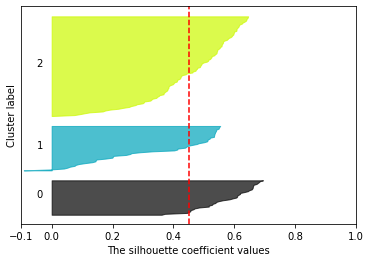

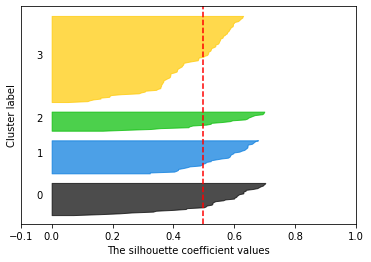

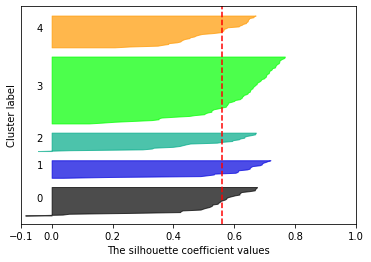

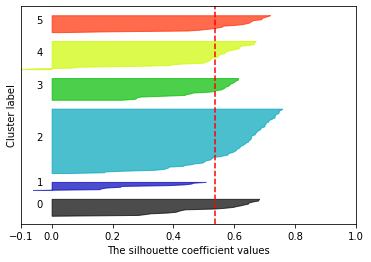

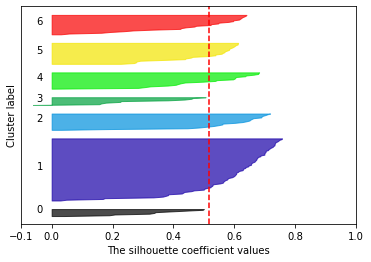

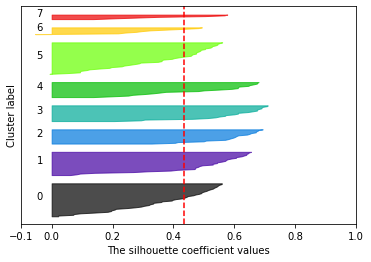

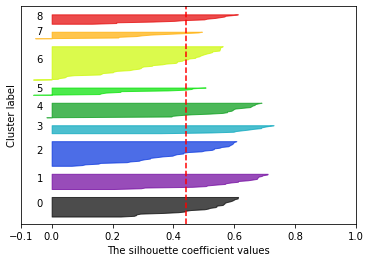

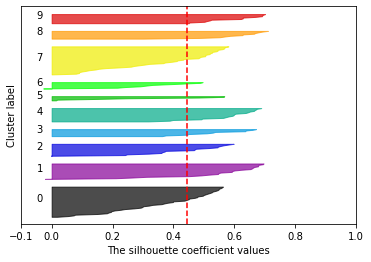

In [17]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [3, 4, 5, 6, 7,8,9,10]

for n_clusters in range_n_clusters:
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df_1) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_1)

    silhouette_avg = silhouette_score(df_1, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", round(silhouette_avg*100,2))

    sample_silhouette_values = silhouette_samples(df_1, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()


#### Best Silhouette score we get when no. of cluster in 5 with 55.95%

In [18]:
Kmeans_model_5 = KMeans(n_clusters=5)
pred=Kmeans_model_5.fit_predict(df_1)
pred

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [19]:
df_1['pred']=pred

In [20]:
df_1

,Annual Income (k$),Spending Score (1-100),pred
0,0.000000,0.387755,0
1,0.000000,0.816327,4
2,0.008197,0.051020,0
3,0.008197,0.775510,4
4,0.016393,0.397959,0
...,...,...,...
195,0.860656,0.795918,1
196,0.909836,0.275510,2
197,0.909836,0.744898,1
198,1.000000,0.173469,2


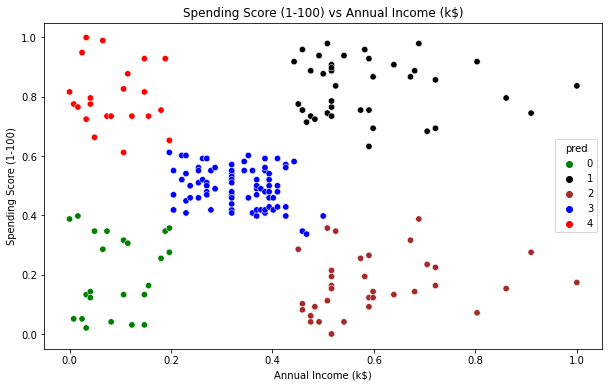

In [21]:
plt.figure(figsize=(10,6))
sb.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="pred",  
                 palette=['green','black','brown','blue','red'],data = df_1 ,s = 40 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

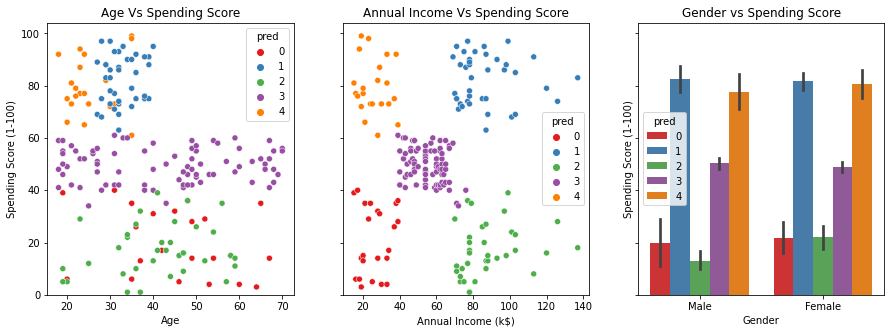

In [56]:
fig, axes= plt.subplots(1, 3, figsize=(15, 5), sharey=True) 
sb.scatterplot(ax=axes[0],x=df.Age, y=df['Spending Score (1-100)'], hue=df_1['pred'],palette="Set1") 
axes[0].set_title('Age Vs Spending Score')

sb.scatterplot(ax=axes[1], x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df_1['pred'], palette= 'Set1') 
axes[1].set_title("Annual Income Vs Spending Score")

sb.barplot (ax=axes [2], x=df.Gender , y=df['Spending Score (1-100)'], hue=df_1['pred'],palette="Set1")
axes[2].set_title("Gender vs Spending Score") 
axes[2].set_xlabel("Gender")
plt.savefig('k_mean.png',format='png')

**Age is the most important factor in determining Spending Score. Irrespective of their Annual income, younger people tend to spend more.**

### Hierarchical Clustering

In [23]:
df_h= df.iloc[:, [3, 4]].values

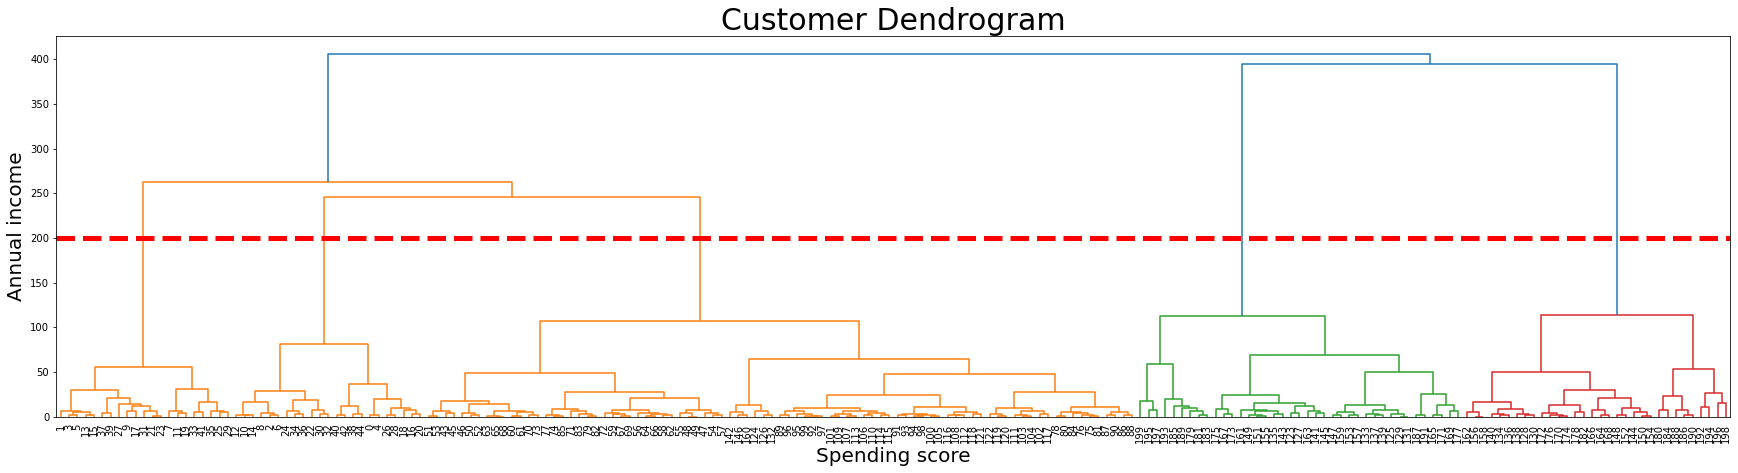

In [24]:
plt.figure(figsize=(30, 7))
dendrogrm = sch.dendrogram(sch.linkage(df_h, method = 'ward'),labels=df.index)
plt.axhline(y=200, color='r', linestyle='--',linewidth=5)
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Customer Dendrogram',fontsize=30)
plt.xlabel('Spending score',fontsize=20)
plt.ylabel('Annual income', fontsize=20)
plt.show()

### Linkage

#### Ward linkage

In [25]:
ward = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_ward = ward.fit_predict(df_h)

#### complete linkage

In [26]:
complete = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')
y_complete = ward.fit_predict(df_h)

#### Average linkage

In [27]:
average = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'average')
y_average = ward.fit_predict(df_h)

In [28]:
single = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'single')
y_single = ward.fit_predict(df_h)

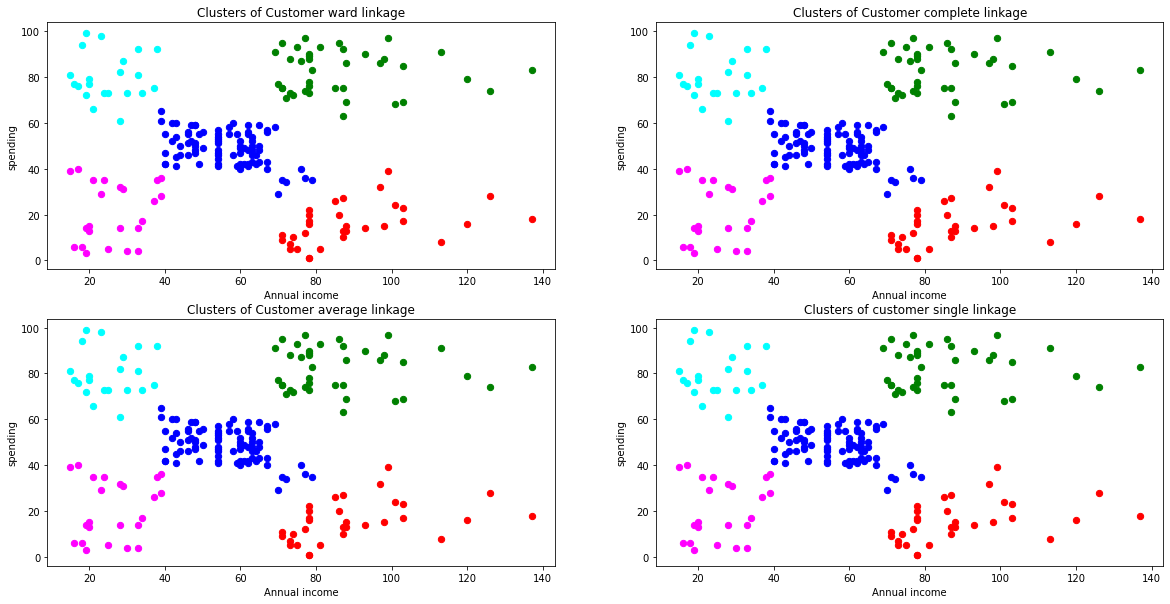

In [29]:
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.scatter(df_h[y_ward == 0, 0], df_h[y_ward == 0, 1], s = 40, c = 'red')
plt.scatter(df_h[y_ward == 1, 0], df_h[y_ward == 1, 1], s = 40, c = 'blue')
plt.scatter(df_h[y_ward == 2, 0], df_h[y_ward == 2, 1], s = 40, c = 'green')
plt.scatter(df_h[y_ward == 3, 0], df_h[y_ward == 3, 1], s = 40, c = 'cyan')
plt.scatter(df_h[y_ward == 4, 0], df_h[y_ward == 4, 1], s = 40, c = 'magenta')
plt.title('Clusters of Customer ward linkage')
plt.xlabel('Annual income')
plt.ylabel('spending')
plt.subplot(222)
plt.scatter(df_h[y_complete == 0, 0], df_h[y_complete == 0, 1], s = 40, c = 'red')
plt.scatter(df_h[y_complete == 1, 0], df_h[y_complete == 1, 1], s = 40, c = 'blue')
plt.scatter(df_h[y_complete == 2, 0], df_h[y_complete == 2, 1], s = 40, c = 'green')
plt.scatter(df_h[y_complete == 3, 0], df_h[y_complete == 3, 1], s = 40, c = 'cyan')
plt.scatter(df_h[y_complete == 4, 0], df_h[y_complete == 4, 1], s = 40, c = 'magenta')
plt.title('Clusters of Customer complete linkage')
plt.xlabel('Annual income')
plt.ylabel('spending')
plt.subplot(223)
plt.scatter(df_h[y_average == 0, 0], df_h[y_average == 0, 1], s = 40, c = 'red')
plt.scatter(df_h[y_average == 1, 0], df_h[y_average == 1, 1], s = 40, c = 'blue')
plt.scatter(df_h[y_average == 2, 0], df_h[y_average == 2, 1], s = 40, c = 'green')
plt.scatter(df_h[y_average == 3, 0], df_h[y_average == 3, 1], s = 40, c = 'cyan')
plt.scatter(df_h[y_average == 4, 0], df_h[y_average == 4, 1], s = 40, c = 'magenta')
plt.title('Clusters of Customer average linkage')
plt.xlabel('Annual income')
plt.ylabel('spending')
plt.subplot(224)
plt.scatter(df_h[y_single == 0, 0], df_h[y_single == 0, 1], s = 40, c = 'red')
plt.scatter(df_h[y_single == 1, 0], df_h[y_single == 1, 1], s = 40, c = 'blue')
plt.scatter(df_h[y_single == 2, 0], df_h[y_single == 2, 1], s = 40, c = 'green')
plt.scatter(df_h[y_single == 3, 0], df_h[y_single == 3, 1], s = 40, c = 'cyan')
plt.scatter(df_h[y_single == 4, 0], df_h[y_single == 4, 1], s = 40, c = 'magenta')
plt.title('Clusters of customer single linkage')
plt.xlabel('Annual income')
plt.ylabel('spending')
plt.show()

#### From above scatter plot all four linkage method shows same plot w.r.t each other

In [30]:
ward = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_ward = ward.fit_predict(df_h)

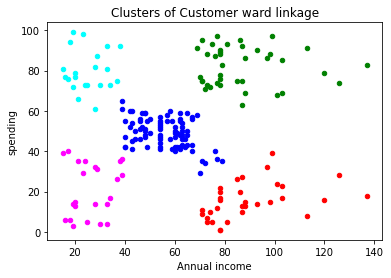

In [31]:
plt.scatter(df_h[y_ward == 0, 0], df_h[y_ward == 0, 1], s = 20, c = 'red')
plt.scatter(df_h[y_ward == 1, 0], df_h[y_ward == 1, 1], s = 20, c = 'blue')
plt.scatter(df_h[y_ward == 2, 0], df_h[y_ward == 2, 1], s = 20, c = 'green')
plt.scatter(df_h[y_ward == 3, 0], df_h[y_ward == 3, 1], s = 20, c = 'cyan')
plt.scatter(df_h[y_ward == 4, 0], df_h[y_ward == 4, 1], s = 20, c = 'magenta')
plt.title('Clusters of Customer ward linkage')
plt.xlabel('Annual income')
plt.ylabel('spending');

## DBSCAN 

In [32]:
df_db= df.iloc[:, [3, 4]].values

In [33]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
distances, indices = nbrs.kneighbors(df[['Annual Income (k$)','Spending Score (1-100)']])

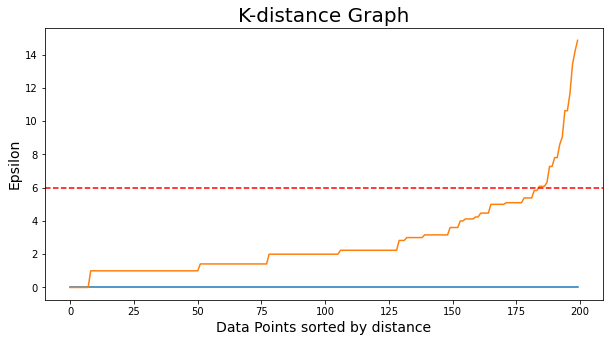

In [34]:
distances = np.sort(distances, axis=0)
distances = distances
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.axhline(y=6, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [35]:
eps=6
for min_samples in [1,2,3,4,5,8,10, 11, 12, 13]:
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(df_db)

    x= cluster_labels +2
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', results)

eps= 6 | min_samples=  1 | obtained clustering:  [(2, 2), (3, 11), (4, 3), (5, 3), (6, 3), (7, 5), (8, 1), (9, 3), (10, 3), (11, 3), (12, 1), (13, 2), (14, 2), (15, 2), (16, 79), (17, 23), (18, 6), (19, 14), (20, 2), (21, 2), (22, 10), (23, 1), (24, 1), (25, 1), (26, 4), (27, 1), (28, 1), (29, 1), (30, 2), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1)]
eps= 6 | min_samples=  2 | obtained clustering:  [(1, 16), (2, 2), (3, 11), (4, 3), (5, 3), (6, 3), (7, 5), (8, 3), (9, 3), (10, 3), (11, 2), (12, 2), (13, 2), (14, 79), (15, 23), (16, 6), (17, 14), (18, 2), (19, 2), (20, 10), (21, 4), (22, 2)]
eps= 6 | min_samples=  3 | obtained clustering:  [(1, 30), (2, 11), (3, 3), (4, 3), (5, 3), (6, 5), (7, 3), (8, 3), (9, 3), (10, 79), (11, 23), (12, 14), (13, 6), (14, 10), (15, 4)]
eps= 6 | min_samples=  4 | obtained clustering:  [(1, 54), (2, 10), (3, 4), (4, 79), (5, 22), (6, 14), (7, 6), (8, 7), (9, 4)]
eps= 6 | min_samples=  5 | obtained clustering:  [(1, 70), (2, 9),

#### Applying DBSCAN algorithm with Hyperparameters to cluster the data

In [36]:
df_db=pd.DataFrame(df_db)
df_db

,0,1
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [37]:
dbscan_m3=DBSCAN(eps=6,min_samples=5)
dbscan_m3.fit(df_db[[0,1]])

DBSCAN(eps=6)

In [38]:
df_db['DBSCAN_m3_labels']=dbscan_m3.labels_
df_db['DBSCAN_m3_labels'].value_counts()

 1    79
-1    70
 4    11
 2    11
 3    10
 0     9
 6     6
 5     4
Name: DBSCAN_m3_labels, dtype: int64

In [39]:
dbscan_m3.labels_

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  4, -1,  2, -1,  4,  3,  2,  3,  2, -1,  2,  3,  4,
        3,  2,  3,  2,  3,  4, -1,  4,  3,  4, -1,  2,  5,  4,  5,  4,  5,
        2,  5,  4,  3,  2,  3,  2, -1,  2,  3,  4, -1, -1,  6,  4, -1, -1,
        6, -1,  6, -1,  6, -1,  6, -1,  6, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

Text(0.5, 0, 'Gender')

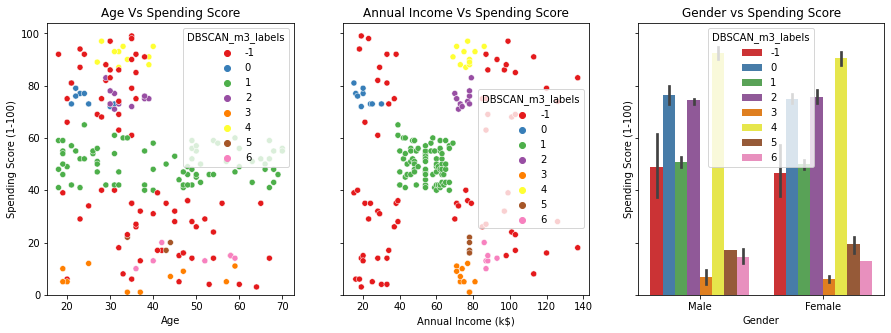

In [40]:
fig, axes= plt.subplots(1, 3, figsize=(15, 5), sharey=True) 
sb.scatterplot(ax=axes[0],x=df.Age, y=df['Spending Score (1-100)'], hue=df_db['DBSCAN_m3_labels'],palette="Set1") 
axes[0].set_title('Age Vs Spending Score')

sb.scatterplot(ax=axes[1], x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df_db['DBSCAN_m3_labels'], palette= 'Set1') 
axes[1].set_title("Annual Income Vs Spending Score")

sb.barplot (ax=axes [2], x=df['Gender'] , y=df['Spending Score (1-100)'], hue=df_db['DBSCAN_m3_labels'],palette="Set1")
axes[2].set_title("Gender vs Spending Score") 
axes[2].set_xlabel("Gender")

#### Similar to KMeans , DBSCAN also shows that Age is the most import factor to consider.

### Models Performance And Evaluation Using silhouette Coefficient

In [41]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [42]:
df_22=df.iloc[:, [3, 4]].values

In [43]:
df_22=pd.DataFrame(df_22)
df_22['k_mean']=pred
df_22['hier']=y_ward
df_22['dbscan']=dbscan_m3.labels_

In [44]:
df_22

,0,1,k_mean,hier,dbscan
0,15,39,0,4,-1
1,15,81,4,3,0
2,16,6,0,4,-1
3,16,77,4,3,0
4,17,40,0,4,-1
...,...,...,...,...,...
195,120,79,1,2,-1
196,126,28,2,0,-1
197,126,74,1,2,-1
198,137,18,2,0,-1


In [45]:
from sklearn.metrics import silhouette_score
coef_kmean= silhouette_score(df_22,df_22['k_mean'])
coef_kmean

0.553626005776434

In [46]:
coef_hier= silhouette_score(df_22,df_22['hier'])
coef_hier

0.5531386485299553

In [47]:
coef_dbscan= silhouette_score(df_22,df_22['dbscan'])
coef_dbscan

0.17817757454448618

In [48]:
per={'Model_name':['K-Mean','Hierarchical Cluster','DBSCAN'],
       'Score':[round(coef_kmean*100,2),round(coef_hier*100,2),round(coef_dbscan*100,2)]}
Result=pd.DataFrame(per)
aa= Result.sort_values(by=['Score'],ascending=False)
aa

,Model_name,Score
0,K-Mean,55.36
1,Hierarchical Cluster,55.31
2,DBSCAN,17.82


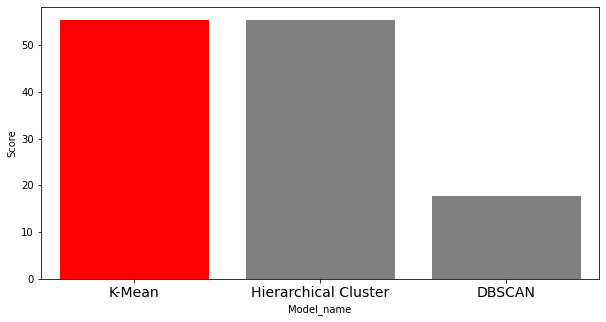

In [55]:
plt.figure(figsize=(10,5))
# plt.title('Best model',size=15)
ax=sb.barplot(data=aa,x='Model_name',y=Result['Score'])
ax.tick_params(axis='x', labelsize=14)
for bar in ax.patches:
    if bar.get_height() >55.31:
        bar.set_color('red')
    else:
        bar.set_color('grey')
plt.savefig('best_model.jpg')

### KMeans Clustering performs better than DBSCAN Clustering and Hierarchical Cluster.